# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [58]:
## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
print('Begining Data Retrieval')
print('----------------------------------------------------')
    
#Calling API
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Lists to store the data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

city_count = 0
set_count = 1

#Loop through cities and append to lists
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        
        if city_count > 48:
            city_count = 1
            set_count += 1
            city_name_list.append(city)
        else:
            city_count += 1
            city_name_list.append(city)
                
        print(f'Processing Record {city_count} of set {set_count} : {response["name"]}')

    except KeyError as KeyError:

        print('City not found. Skipping...')
        
print('----------------------------------------------------')
        

Begining Data Retrieval
----------------------------------------------------
Processing Record 1 of set 1 : Bluff
Processing Record 2 of set 1 : Burnie
Processing Record 3 of set 1 : Boueni
Processing Record 4 of set 1 : Mataura
Processing Record 5 of set 1 : Talnakh
Processing Record 6 of set 1 : Loandjili
Processing Record 7 of set 1 : Barrow
City not found. Skipping...
Processing Record 8 of set 1 : Zarand
Processing Record 9 of set 1 : New Norfolk
Processing Record 10 of set 1 : Khewra
Processing Record 11 of set 1 : Upernavik
Processing Record 12 of set 1 : Acajutla
Processing Record 13 of set 1 : Albany
Processing Record 14 of set 1 : Mabaruma
Processing Record 15 of set 1 : Busselton
Processing Record 16 of set 1 : Torbay
Processing Record 17 of set 1 : Tapiramutá
Processing Record 18 of set 1 : Punta Arenas
Processing Record 19 of set 1 : Chui
Processing Record 20 of set 1 : Ubari
Processing Record 21 of set 1 : Konjic
Processing Record 22 of set 1 : Touros
Processing Record 23

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Create dataframe
weather_dict = {
    "City" : city_name_list, 
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list
}

df_weather_dict = pd.DataFrame(weather_dict)

df_weather_dict

In [ ]:
df_weather_dict.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [53]:
df_weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.505053,16.716081,49.869700,75.029982,50.975309,8.076208,1.610079e+09
std,33.044519,92.141372,30.986869,18.231554,39.584763,5.815824,7.944275e+01
min,-54.800000,-175.200000,-45.150000,9.000000,0.000000,0.510000,1.610079e+09
25%,-8.881700,-67.091050,29.425000,67.000000,7.000000,3.490000,1.610079e+09
50%,23.016700,22.957300,59.000000,79.000000,53.000000,6.910000,1.610079e+09
75%,46.644950,100.344850,76.025000,88.000000,90.000000,11.170000,1.610079e+09
max,78.218600,179.316700,107.040000,100.000000,100.000000,34.520000,1.610080e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

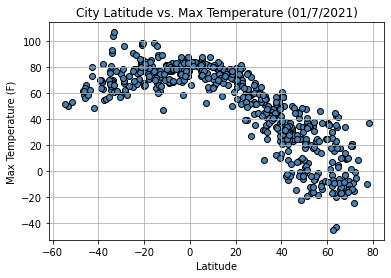

In [56]:
plt.scatter(df_weather_dict["Lat"],df_weather_dict["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (01/7/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("output_data/Latitude vs. Temperature.png")
plt.show()

In [ ]:
#add coments:

## Latitude vs. Humidity Plot

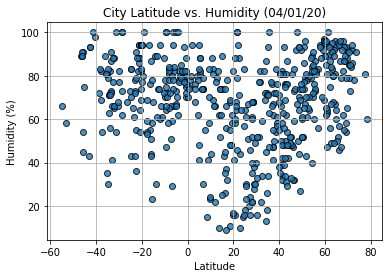

## Latitude vs. Cloudiness Plot

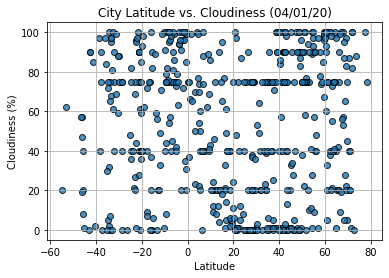

## Latitude vs. Wind Speed Plot

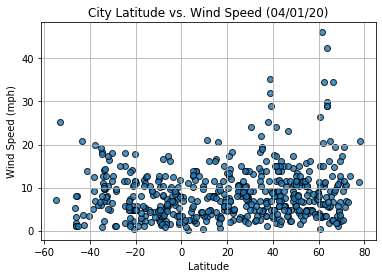

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


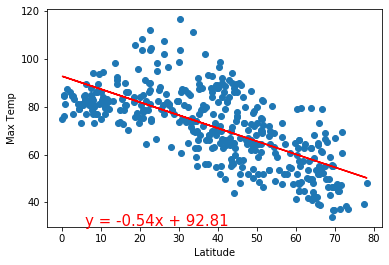

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


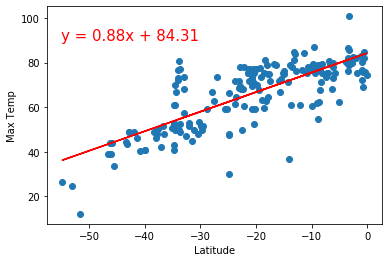

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


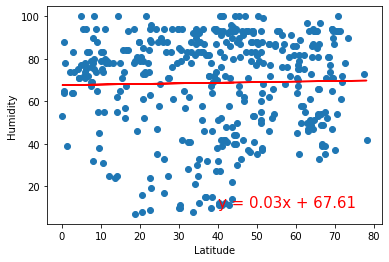

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


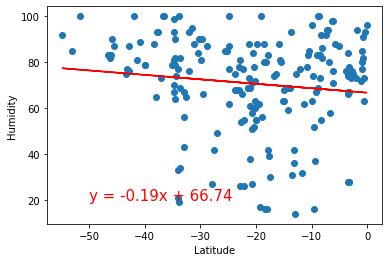

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


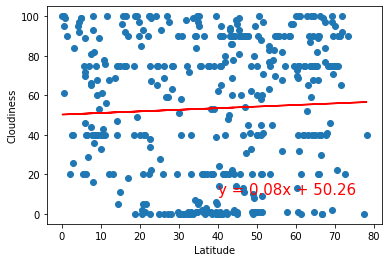

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


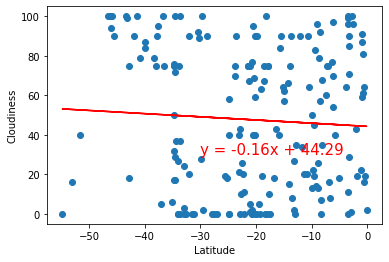

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


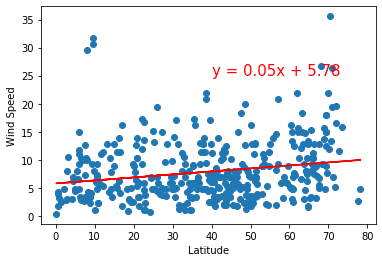

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


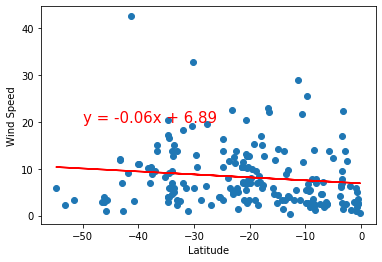